### import necessary modules

In [2]:
import joblib
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib import colors
import dataframe_image as dfi
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pd.set_option("display.max_columns", None)

%run ../src/utils_io.py
%run ../src/utils_viz.py
%run ../src/scaling.py
%run ../src/grid_search.py

### load the data

In [36]:
log_train_df = pd.read_pickle('../input/advance_dataset/train_test_data_result/train_preds_log_regg.pkl')
log_test_df = pd.read_pickle('../input/advance_dataset/train_test_data_result/test_preds_log_regg.pkl')

rnd_train_df = pd.read_pickle('../input/advance_dataset/train_test_data_result/train_preds_random_forest.pkl')
rnd_test_df = pd.read_pickle('../input/advance_dataset/train_test_data_result/test_preds_random_forest.pkl')

xb_train_df = pd.read_pickle('../input/advance_dataset/train_test_data_result/train_preds_xg_boost.pkl')
xb_test_df = pd.read_pickle('../input/advance_dataset/train_test_data_result/test_preds_xg_boost.pkl')

### plot the statsbomb_xg_values

In [26]:
## title of our plots
title_1 = "Statsbomb xG value for train-set"
title_2 = "Statsbomb xG value for test-set"

## path where plots will be saved
path = "../plots/real_values/"

## name of the plots that will be saved
name_1 = "train.jpg"
name_2 = "test.jpg"

## check for directory
if os.path.isdir(path) == False:
    os.mkdir(path)

## make the plots
xG_plot(log_train_df, "shot_statsbomb_xg", title_1, path + name_1)
xG_plot(log_test_df, "shot_statsbomb_xg", title_2, path + name_2)

plt.close("all")

## training plots

In [37]:
title_1 = "Logistic Regression on train-set"
title_2 = "Random Forest on train-set"
title_3 = "xG Boost on train-set"

path_1 = "../plots/advance_model/"

name_1 = "log_train.jpg"
name_2 = "rnd_train.jpg"
name_3 = "xb_train.jpg"

if os.path.isdir(path_1) == False:
    os.mkdir(path_1)

xG_plot(log_train_df, "pred_log_regg", title_1, path_1 + name_1)
xG_plot(rnd_train_df, "pred_random_forest", title_2, path_1 + name_2)
xG_plot(xb_train_df, "pred_xg_boost", title_3, path_1 + name_3)

plt.close("all")

## test plots

In [38]:
title_1 = "Logistic Regression on test-set"
title_2 = "Random Forest on test-set"
title_3 = "xG Boost on test-set"

path_1 = "../plots/advance_model/"

name_1 = "log_test.jpg"
name_2 = "rnd_test.jpg"
name_3 = "xb_test.jpg"

if os.path.isdir(path_1) == False:
    os.mkdir(path_1)

xG_plot(log_test_df, "pred_log_regg", title_1, path_1 + name_1)
xG_plot(rnd_test_df, "pred_random_forest", title_2, path_1 + name_2)
xG_plot(xb_test_df, "pred_xg_boost", title_3, path_1 + name_3)

plt.close("all")

## aggregated xG values

In [39]:
first_df = make_df(
    log_train_df, 
    cols=["player_name", "target", "shot_statsbomb_xg", "pred_log_regg"]
)

second_df = make_df(
    rnd_train_df, 
    cols=["player_name", "target", "shot_statsbomb_xg", "pred_random_forest"]
)["pred_random_forest"]

third_df = make_df(
    xb_train_df, 
    cols=["player_name", "target", "shot_statsbomb_xg", "pred_xg_boost"]
)["pred_xg_boost"]

main_df = pd.concat([first_df, second_df, third_df], axis=1)

path_1 = "../plots/advance_model/"
name_1 = "train_simple.png"

if os.path.isdir(path_1) == False:
    os.mkdir(path_1) 

plot_dataframe(
    main_df,
    path=path_1 + name_1
)

In [40]:
first_df = make_df(
    log_test_df, 
    cols=["player_name", "target", "shot_statsbomb_xg", "pred_log_regg"]
)

second_df = make_df(
    rnd_test_df, 
    cols=["player_name", "target", "shot_statsbomb_xg", "pred_random_forest"]
)["pred_random_forest"]

third_df = make_df(
    xb_test_df, 
    cols=["player_name", "target", "shot_statsbomb_xg", "pred_xg_boost"]
)["pred_xg_boost"]

main_df = pd.concat([first_df, second_df, third_df], axis=1)


path_1 = "../plots/advance_model/"
name_1 = "test_simple.png"

if os.path.isdir(path_1) == False:
    os.mkdir(path_1) 

plot_dataframe(
    main_df,
    path=path_1 + name_1
)

### P-value

In [104]:
## read in the dataset
train_df = pd.read_pickle("../input/advance_dataset/train_test_data_final/train_ohe_final.pkl")

## drop unnecessary columns
x_train = train_df.drop(["target"], axis=1)

## scale the values
scale = Scale(
    df = x_train,
    scale_type = "std",
    cols = [
        "angle", "player_in_between", "goal_keeper_angle", "distance"
    ]
)

x_train = scale.fit_transform()

## fetch target values for train and test dataframe
y_train = train_df['target'].values

## get summary
lm = get_stats(x_train, y_train)

print(lm.summary())

Optimization terminated successfully.
         Current function value: 0.362577
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                15732
Model:                          Logit   Df Residuals:                    15716
Method:                           MLE   Df Model:                           15
Date:                Wed, 18 Nov 2020   Pseudo R-squ.:                0.007096
Time:                        21:38:08   Log-Likelihood:                -5704.1
converged:                       True   LL-Null:                       -5744.8
Covariance Type:            nonrobust   LLR p-value:                 3.671e-11
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
open_goal             0.7809      0.221      3.529      0.000       0.347       1.215
under_pr

## Feature Importance: Random Forest

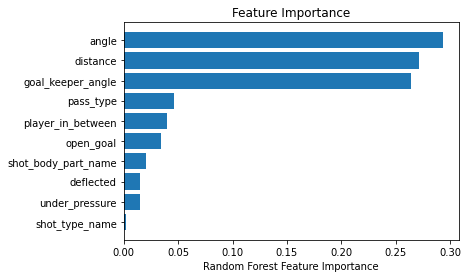

In [105]:
## read in the dataset
train_df = pd.read_pickle("../input/advance_dataset/train_test_data_final/train_label_final.pkl")

## drop unnecessary columns
x_train = train_df.drop(["target"], axis=1)
y_train = train_df["target"]

## columns
col_names = x_train.columns

## model
model = RandomForestClassifier()

## fit the model
model.fit(x_train, y_train)

## feature importance
importances = model.feature_importances_
idsx = np.argsort(importances)
plt.title("Feature Importance")
plt.barh(range(len(idsx)), importances[idsx], align="center")
plt.yticks(range(len(idsx)), [col_names[i] for i in idsx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

## Feature Importance: xGBoost

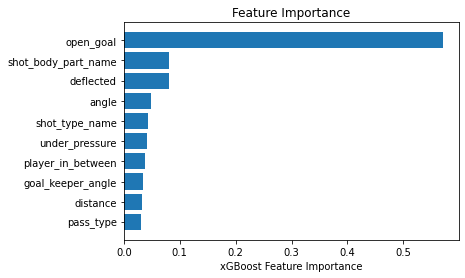

In [106]:
## read in the dataset
train_df = pd.read_pickle("../input/advance_dataset/train_test_data_final/train_label_final.pkl")

## drop unnecessary columns
x_train = train_df.drop(["target"], axis=1)
y_train = train_df["target"]

## columns
col_names = x_train.columns

## model
model = XGBClassifier()

## fit the model
model.fit(x_train, y_train)

## feature importance
importances = model.feature_importances_
idsx = np.argsort(importances)
plt.title("Feature Importance")
plt.barh(range(len(idsx)), importances[idsx], align="center")
plt.yticks(range(len(idsx)), [col_names[i] for i in idsx])
plt.xlabel("xGBoost Feature Importance")
plt.show()

### Log-Reg

In [108]:
## read in the dataset
train_df = pd.read_pickle("../input/advance_dataset/train_test_data_final/train_ohe_final.pkl")

## drop unnecessary columns
x_train = train_df.drop(["target"], axis=1)

## scale the values
scale = Scale(
    df = x_train,
    scale_type = "std",
    cols = [
        "angle", "player_in_between", "goal_keeper_angle", "distance"
    ]
)

x_train = scale.fit_transform()

## fetch target values for train and test dataframe
y_train = train_df['target'].values
x_train = x_train.values

params = tune_log_model(x_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    7.7s finished
ROC-AUC : 0.803485559799362


In [109]:
params

{'C': 0.3593813663804626, 'penalty': 'l2', 'solver': 'lbfgs'}

### Random Forest

In [110]:
## read in the dataset
train_df = pd.read_pickle("../input/advance_dataset/train_test_data_final/train_label_final.pkl")

## drop unnecessary columns
x_train = train_df.drop(["target"], axis=1)

## fetch target values for train and test dataframe
y_train = train_df['target'].values
x_train = x_train.values

params = tune_random_forest(x_train, y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:  9.3min finished
ROC-AUC : 0.8100737815918224


In [111]:
params

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_split': 2,
 'n_estimators': 100}

### xG Boost

In [112]:
## read in the dataset
train_df = pd.read_pickle("../input/advance_dataset/train_test_data_final/train_label_final.pkl")

## drop unnecessary columns
x_train = train_df.drop(["target"], axis=1)

## fetch target values for train and test dataframe
y_train = train_df['target'].values
x_train = x_train.values

params = tune_xg_boost(x_train, y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed:  1.6min finished
ROC-AUC : 0.8100990588353962


In [113]:
params

{'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.3}